In [1]:
# Imports
import cv2
import helper_functions as helper
from imutils import paths
import numpy as np
from matplotlib import pyplot as plt

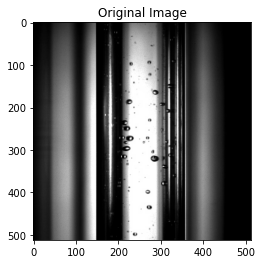

True

In [2]:
#Load and rotate/resize all images in specified directory into list_images

path   ='data/images/bubbly'
resize = 0
index = 60      # using frame 50 for comparisons
    
image_path = list(paths.list_images(path))    # stores all image loactions
list_images = []                                    


image = cv2.imread(image_path[index])

disp = helper.dispImg(image,'Original Image')
cv2.imwrite('data/preprocess/0-original.png',image)


# Create mask image to get ROI (region of interest)

True

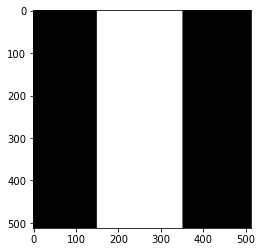

In [3]:
# creating a square of zeros using a variable
rectangle = np.zeros((512, 512), dtype="uint8")
cv2.rectangle(rectangle, (150, 512), (350, 0), 255, -1)
plt.imshow( rectangle, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('data/preprocess/1-mask.png',rectangle)

# Perfrom background subtraction


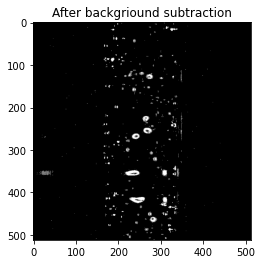

True

In [4]:
cap = cv2.VideoCapture('data/regime_videos/bubbly/20210127_15.50_T=+5_m=5_x=0_q=AD_up_bubbly_512x512_mp4_C001H001S0001.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

output = []

for i in range(100): # 100 is the number of frames to process
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    output.append(fgmask)
 
cap.release()
cv2.destroyAllWindows()

plt.imshow(output[index], cmap='gray', vmin=0, vmax=255)   # the images in output are greyscale; displaying frame 50
plt.title('After backgriound subtraction')
plt.show()

cv2.imwrite('data/preprocess/2-back_sub.png',output[index])


# Noise Reduction/removal
cv2.fastNlMeansDenoisingMulti(output, 2, 5, None, 4, 7, 35)\
The first argument is the list of noisy frames. Second argument imgToDenoiseIndex specifies which frame we need to denoise, for that we pass the index of frame in our input list. Third is the temporalWindowSize which specifies the number of nearby frames to be used for denoising. It should be odd. In that case, a total of temporalWindowSize frames are used where central frame is the frame to be denoised.


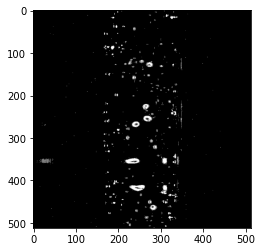

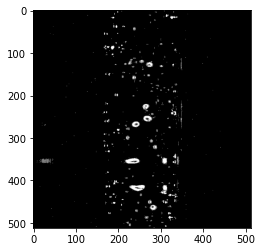

True

In [5]:


dst = cv2.fastNlMeansDenoisingMulti(output, index, 5, None, 4, 7, 35)

plt.imshow(output[index],'gray')
plt.show()
plt.imshow(dst,'gray')
plt.show()

cv2.imwrite('data/preprocess/3-noise_reduc.png',dst)


# Binarize Image using thresholding

True

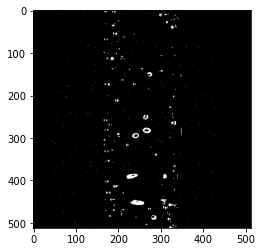

In [6]:
th, im_th = cv2.threshold(output[50], 128, 255, cv2.THRESH_BINARY)

plt.imshow(im_th,'gray')
cv2.imwrite('data/preprocess/4-binarize.png',im_th)

# Mask processed image with mask image

True

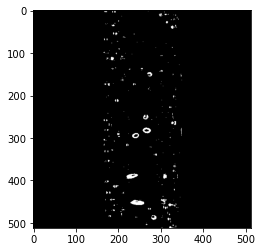

In [7]:
masked = cv2.bitwise_and(rectangle, im_th)

plt.imshow(masked,'gray')
cv2.imwrite('data/preprocess/5-masked.png',masked)

In [8]:
#The masked image was processed with connected component
#analysis for “blob” detection. The blobs represent the water
#slugs in the channel
